# The residuals plot in the paper.

In [11]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

import kepler_kinematics as kek
from scipy.stats import multivariate_normal

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [13]:
# df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")
df = pd.read_csv("../kepler_kinematics/data.csv")

Load the results file.

In [14]:
# results = pd.read_csv("../data/all_kepler4.csv")
results = pd.read_csv("../data/edr3_all.csv")

In [15]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vx_random,vy_inferred,vy_inferred_errp,...,vxvx_covar,vxvy_covar,vxvz_covar,vxlnd_covar,vyvy_covar,vyvz_covar,vylnd_covar,vzvz_covar,vzlnd_covar,lndlnd_covar
0,0,0,10591921,56.371081,3.768216,3.630346,3.696134,44.671405,220.949303,17.890319,...,13.664820,62.537536,18.705624,0.026965,313.358540,93.092448,0.014367,27.687618,0.006844,0.000498
1,0,0,7130963,119.698919,8.363227,7.831062,8.193393,108.823618,213.092435,17.129904,...,67.148477,74.733055,21.555536,0.420483,320.148348,54.820718,-0.034193,11.051924,0.069860,0.003713
2,0,0,11450155,40.032305,2.939978,2.848907,2.921070,36.855476,222.241205,17.426355,...,8.534784,50.623898,15.184631,0.001657,302.803567,90.715184,-0.003396,27.184465,-0.000416,0.000072
3,0,0,5002215,4.453964,5.873706,5.880390,5.956576,8.561550,219.731461,17.781112,...,35.489676,107.570357,25.533901,-0.001598,326.093871,77.404065,-0.004842,18.411212,0.001062,0.000145
4,0,0,10590779,44.636308,3.687043,3.847459,3.692574,49.699271,234.092668,18.117984,...,13.638515,66.752811,20.160310,0.006502,332.542511,101.101513,-0.001364,30.823818,-0.004363,0.000198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,9174647,-3.936250,3.393397,3.322597,3.327926,-4.419582,218.060598,18.767930,...,11.077859,60.913967,9.554350,-0.012808,341.541748,55.438686,0.008890,9.715439,0.029796,0.001201
4996,0,0,9071529,-2.901478,4.215663,4.441281,4.368328,-5.788377,220.197300,15.999977,...,19.087063,72.071090,25.244421,-0.000023,272.232720,95.379374,0.001859,33.427961,0.001349,0.000055
4997,0,0,4269766,137.236524,7.463006,7.266200,7.487809,138.766243,218.131449,18.382394,...,56.081311,104.897909,15.496556,0.173166,335.431930,58.218487,-0.003579,10.456426,-0.020940,0.001308
4998,0,0,2714955,0.405417,6.311927,6.766962,6.461312,0.896109,226.072508,17.854060,...,41.758988,118.910721,21.758277,-0.005848,339.035275,62.031107,-0.004170,11.369028,-0.001581,0.000763


Merge the results file and the data file.

In [16]:
adf = pd.merge(df, results, on="kepid", how="right")

In [48]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               lndistance_inferred_err, r_est, lndistance_inferred,
               ms=2, alpha=.1, box_size=120):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(0, 10, 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    ax6.set_xlim(0, 10)
    ax6.set_ylim(0, 10)
    ax6.set_ylabel("$\mathrm{\ln(D/Kpc)~inferred}$")
    ax6.set_xticklabels([])
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
#     ax3.errorbar(vx, vx_inferred - vx, yerr=vx_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", ms=4, label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
#     ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")
    ax3.legend(fontsize=13)

    ax4 = plt.subplot(gs[1, 1])
#     ax4.errorbar(vy, vy_inferred-vy, yerr=vy_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.plot(vy, vy_inferred-vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.", ms=4)
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[kms^{-1}]}$")
#     ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax5 = plt.subplot(gs[1, 2])
#     ax5.errorbar(vz, vz_inferred - vz, yerr=vz_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.", ms=4)
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[kms^{-1}]}$")
#     ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax7 = plt.subplot(gs[1, 3])
#     ax7.errorbar(r_est, lndistance_inferred-r_est, fmt="k.", yerr=lndistance_inferred_err, ms=ms+2,
#                  mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.errorbar(0, -.1, yerr=np.median(lndistance_inferred_err), fmt="k.", ms=4)
    ax7.axhline(0, color="k", ls="--", zorder=1)
    ax7.set_ylim(-.5, .5)
    ax7.set_xlabel("$\mathrm{Distance~true~[kpc]}$")
    ax7.set_ylabel("$\mathrm{Inferred-True~[kpc]}$")
        
    return fig

typical vz uncertainty =  4.144714597164206 -4.470083155511148


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


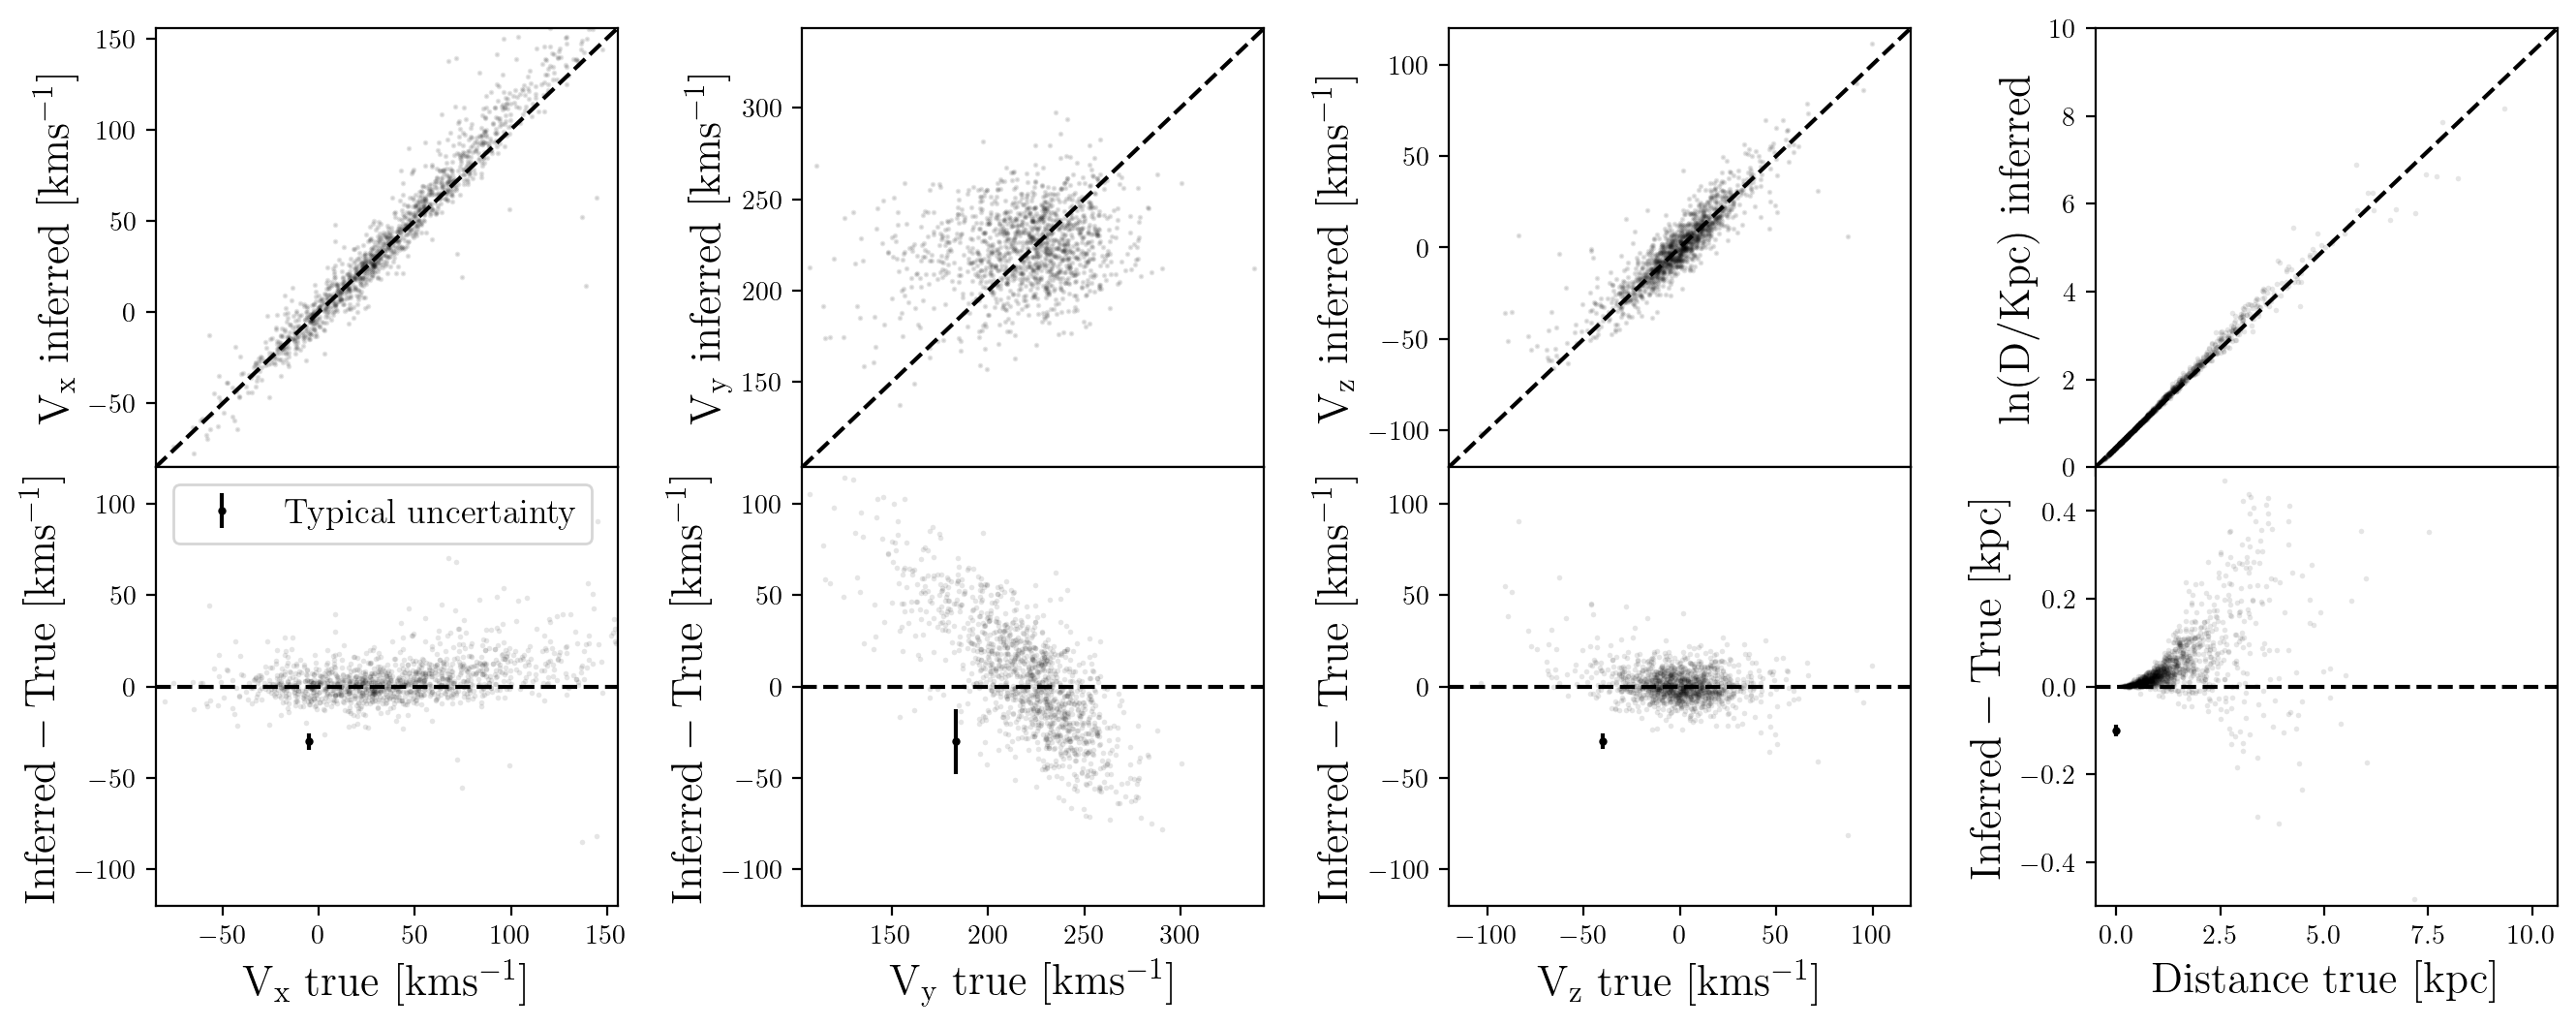

In [49]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
m &= np.isfinite(adf.vx_random.values) & np.isfinite(adf.vy_random.values) & np.isfinite(adf.vz_random.values) \
    & np.isfinite(adf.lndistance_random.values)

fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_random.values[m],
                 adf.vy_random.values[m], adf.vz_random.values[m],
                 adf.vx_inferred_err.values[m], adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.lndistance_inferred_err.values[m],
                 1./adf.parallax.values[m], np.exp(adf.lndistance_random.values[m]))
#                  adf.r_med_photogeo.values[m]*1e-3, 1./adf.parallax.values[m])
#                  adf.r_med_photogeo.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))
#                  adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))


plt.tight_layout()
plt.savefig("../plots/residuals")
plt.savefig("../paper/residuals.pdf")

(0.0, 6.0)

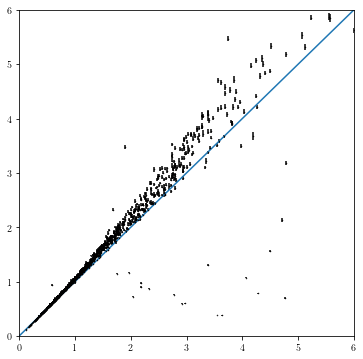

In [50]:
plt.figure(figsize=(6, 6))
# plt.plot(1./adf.parallax.values[m], np.exp(adf.lndistance_random.values[m]), "k.", ms=1)
plt.errorbar(adf.r_med_photogeo.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]),
             yerr=adf.lndistance_inferred_err.values[m], fmt="k.", ms=1)

xs = np.linspace(0, 10, 100)
plt.plot(xs, xs)
plt.xlim(0, 6)
plt.ylim(0, 6)

In [10]:
print(f"Median vx uncertainty = {np.median(adf.vx_inferred_err):.2f} km/s, {np.median(adf.vx_inferred_err)/np.median(adf.vx_inferred)*100:.2f} %")
print(f"Median vy uncertainty = {np.median(adf.vy_inferred_err):.2f} km/s, {np.median(adf.vy_inferred_err)/np.median(adf.vy_inferred)*100:.2f} %")
print(f"Median vz uncertainty = {np.median(adf.vz_inferred_err):.2f} km/s, {np.median(adf.vz_inferred_err)/np.median(adf.vz_inferred)*100:.2f} %")
print(f"Median lnD uncertainty = {np.median(np.exp(adf.lndistance_inferred_err)):.2f} pc, {np.median(adf.lndistance_inferred_err)*100:.2f} %")

def RMS(y):
    return np.sqrt(np.mean(y**2))

def MAD(y1, y2):
    return np.median(abs(y1-y2))


print(f"vx RMS = {RMS(adf.vx_inferred-adf.vx):.2f} km/s, MAD = {MAD(adf.vx_inferred, adf.vx):.2f}")
print(f"vy RMS = {RMS(adf.vy_inferred-adf.vy):.2f} km/s, MAD = {MAD(adf.vy_inferred, adf.vy):.2f}")
print(f"vz RMS = {RMS(adf.vz_inferred-adf.vz):.2f} km/s, MAD = {MAD(adf.vz_inferred, adf.vz):.2f}")

Median vx uncertainty = 4.49 km/s, 13.85 %
Median vy uncertainty = 17.83 km/s, 7.94 %
Median vz uncertainty = 4.17 km/s, -6736.38 %
Median lnD uncertainty = 1.01 pc, 1.29 %
vx RMS = 16.02 km/s, MAD = nan
vy RMS = 30.78 km/s, MAD = nan
vz RMS = 13.85 km/s, MAD = nan


How many stars lie within 1 sigma?

0.697
0.7356
0.7362
1.0


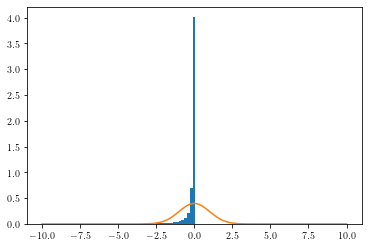

In [11]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

# plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
# xs = np.linspace(-10, 10, 100)
# plt.plot(xs, gauss(xs, 0, 1))

nsigma = (adf.vx_inferred.values - adf.vx.values)/adf.vx_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vy_inferred.values - adf.vy.values)/adf.vy_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vz_inferred.values - adf.vz.values)/adf.vz_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.lndistance_inferred.values - np.log(1./adf.parallax.values))/adf.lndistance_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

plt.clf()
plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
xs = np.linspace(-10, 10, 100)
plt.plot(xs, gauss(xs, 0, 1))

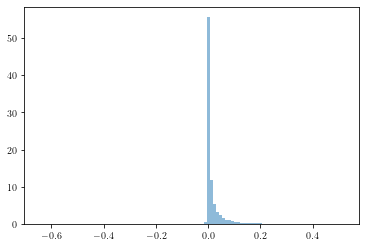

In [72]:
# plt.hist(adf.lndistance_inferred.values, density=True, alpha=.5);
# plt.hist(np.log(1/adf.parallax.values), density=True, alpha=.5);
plt.hist(np.log(1/adf.parallax.values) - adf.lndistance_inferred.values, 100, density=True, alpha=.5);

In [42]:
p = np.zeros(len(adf))
from tqdm import trange
for i in trange(len(adf)):
    cov = [[adf.vx_inferred_err.values[i]**2, 0, 0, 0],
           [0, adf.vy_inferred_err.values[i]**2, 0, 0],
           [0, 0, adf.vz_inferred_err.values[i]**2, 0],
           [0, 0, 0, adf.lndistance_inferred_err.values[i]**2]]
    mvn = multivariate_normal([adf.vx_inferred.values[i], adf.vy_inferred.values[i],
                               adf.vz_inferred.values[i], adf.lndistance_inferred.values[i]], cov)
    p[i] = mvn.pdf([adf.vx.values[i], adf.vy.values[i], adf.vz.values[i], np.log(adf.r_est.values[i]*1e-3)])

100%|██████████| 4987/4987 [00:01<00:00, 3577.65it/s]


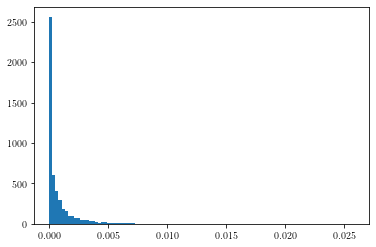

In [43]:
plt.hist(p, 100);

In [41]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

0.24197072451914337


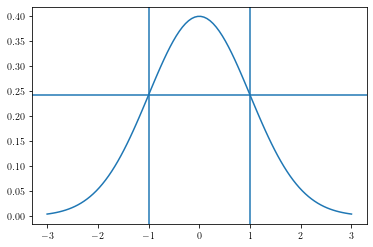

In [44]:
xs = np.linspace(-3, 3, 100)
plt.plot(xs, gauss(xs, 0, 1))
plt.axvline(1)
plt.axvline(-1)
plt.axhline(gauss(1., 0., 1.))
print(gauss(1., 0., 1.))